# effiency of $CC1p$ events

In [2]:
import sys; sys.path.insert(0, '../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline
sns.set(font_scale=2);sns.set_style("whitegrid");

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [3]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/Xsec/Figures/phase-space/'

In [4]:
versions['overlay date'] = '2018_08_16'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
versions['data date'] = '2018_08_16'
versions['beam on'] = 'prod_reco_optfilter_bnb_v12_unblind_mcc8'
versions['beam off'] = 'prod_reco_optfilter_extbnb_v12_mcc8_dev'
selected_overlay,selected_overlay_concat,selected_CC1p,genie_CC1p,selected_beam_on,selected_beam_off = load_mc_and_data()

found selected_cosmic.csv, loading it...
checked /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_selected_on_beam.csv and found the file...
checked /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_08_16_selected_genie_CC1p.csv and found the file...
9933 selected CC1p events overlay


# overlay throught cuts

In [5]:
versions['overlay date'] = '2018_08_16'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
OverlaySamples = load_samples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
cuts_order  = ['no cut','Chi2Proton','Nflashes','MatchedFlash','length','non-collinearity','vertex activity','delta phi','Pt & delta phi']
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)

285009 ccqe candidate pairs, 180070 in FV
74387 are 1mu-1p, 41.3%
55226 are other-pairs, 30.7%
155396 are cosmic, 86.3%
--------------------------------------------------------------
36843 are CC1p0pi, 20.5%
--------------------------------------------------------------
40729 are CC1p, 22.6%
I finished loading overlay samples. We have in total 285009 pairs


In [6]:
overlay_CC1p = reducedOverlay['Pt & delta phi']['CC1p']

# GENIE

In [7]:
genie = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/'
                                    +versions['overlay date']+'/'
                                    +versions['Overlay']+'_'+versions['overlay date']+'_genie.csv')

print len(genie),'events in genie'
genie_CC1p = genie[(genie.IsCC_1p_200MeVc==True)
                   & ((genie.truth_x>3) & (genie.truth_x<256))
                   & ((genie.truth_y>-115) & (genie.truth_y<115))
                   & ((genie.truth_z>5) & (genie.truth_y<1037))
                  ]

930168 events in genie


# beam-on

In [8]:
OnBeam = pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['beam on']+'_'+versions['data date']+'_vertices.csv')
OffBeam = pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['beam off']+'_'+versions['data date']+'_vertices.csv')
reducedOnBeam,reducedOffBeam,numbers = apply_cuts_to_data(OnBeam=OnBeam,OffBeam=OffBeam,cuts_order=cuts_order)
print 'applied cuts to data'
selected_beam_on = reducedOnBeam['Pt & delta phi']

applied cuts to data


# phase-space: selected beam-on events  

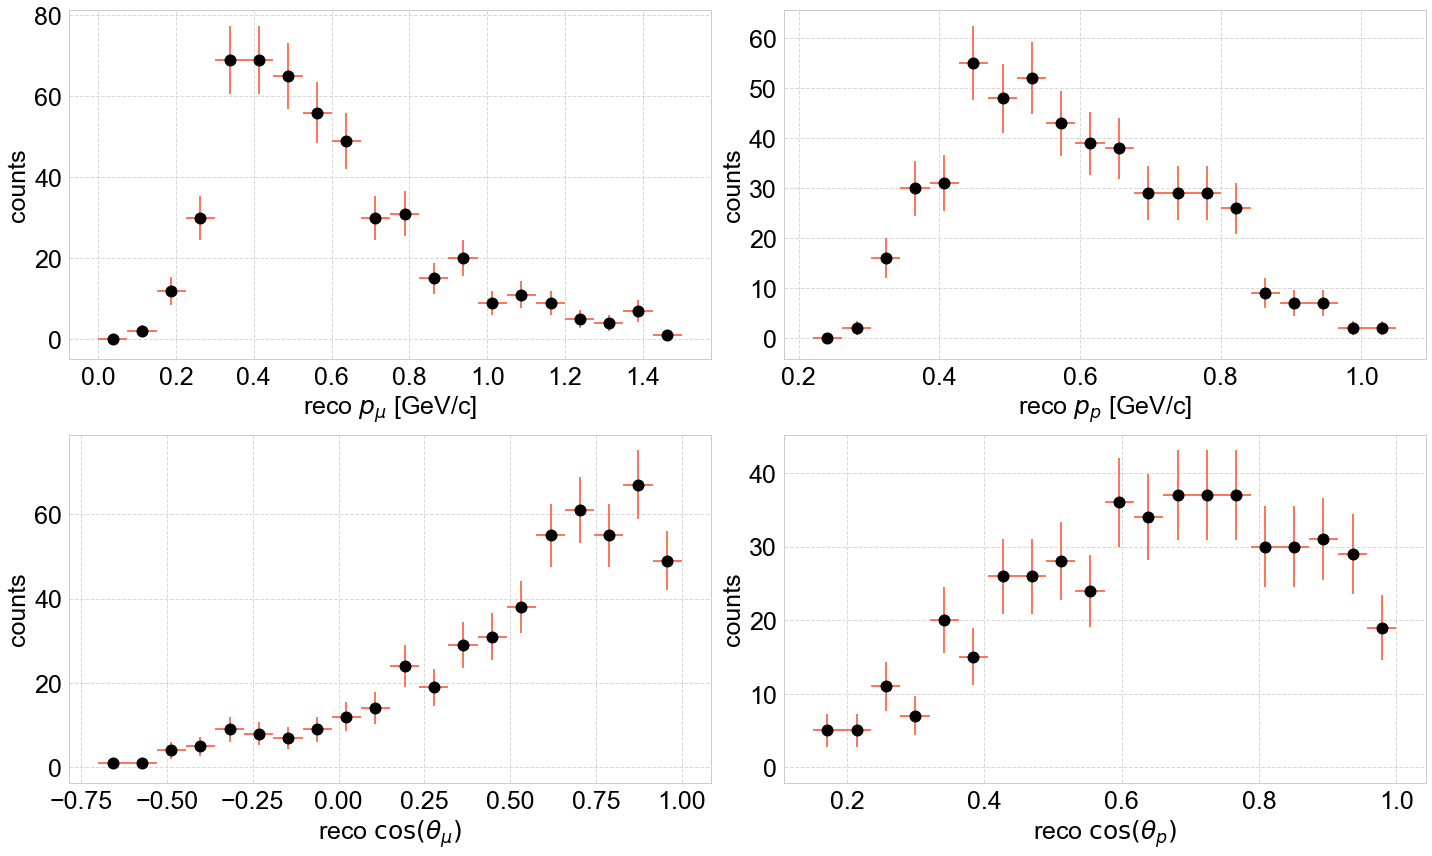

In [9]:
ylabel=r'counts'
fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(2,2,1)
plot_OnBeam(ax=ax,bins=linspace(0,1.5,21),color=Colors['beam off'],var='reco_Pmu_mcs',OnBeamSample=selected_beam_on,ecolor=Colors['beam on'])
set_axes(ax,x_label=r'reco '+(Vlabels['Pmu']+' ['+Units['Pmu']+']'),y_label=ylabel)

ax=fig.add_subplot(2,2,2)
plot_OnBeam(ax=ax,bins=linspace(.22,1.05,21),color=Colors['beam off'],var='reco_Pp',OnBeamSample=selected_beam_on,ecolor=Colors['beam on'])
set_axes(ax,x_label=r'reco '+(Vlabels['Pp']+' ['+Units['Pp']+']'),y_label=ylabel)

ax=fig.add_subplot(2,2,3)
plot_OnBeam(ax=ax,bins=linspace(-0.70,1,21),color=Colors['beam off'],var='reco_Pmu_cos_theta',OnBeamSample=selected_beam_on,ecolor=Colors['beam on'])
set_axes(ax,x_label=r'reco '+Vlabels['cos(theta(mu))'],y_label=ylabel)


ax=fig.add_subplot(2,2,4)
plot_OnBeam(ax=ax,bins=linspace(0.15,1,21),color=Colors['beam off'],var='reco_Pp_cos_theta',OnBeamSample=selected_beam_on,ecolor=Colors['beam on'])
set_axes(ax,x_label=r'reco '+Vlabels['cos(theta(p))'],y_label=ylabel)
plt.tight_layout()

# phase-space: remove regions with poor efficiency

0.075 < Pmu < 1.475
0.2615 < Pp < 1.03616666667
-0.671666666667 < cos theta(mu) < 0.971666666667
0.164166666667 < cos theta(p) < 0.985833333333


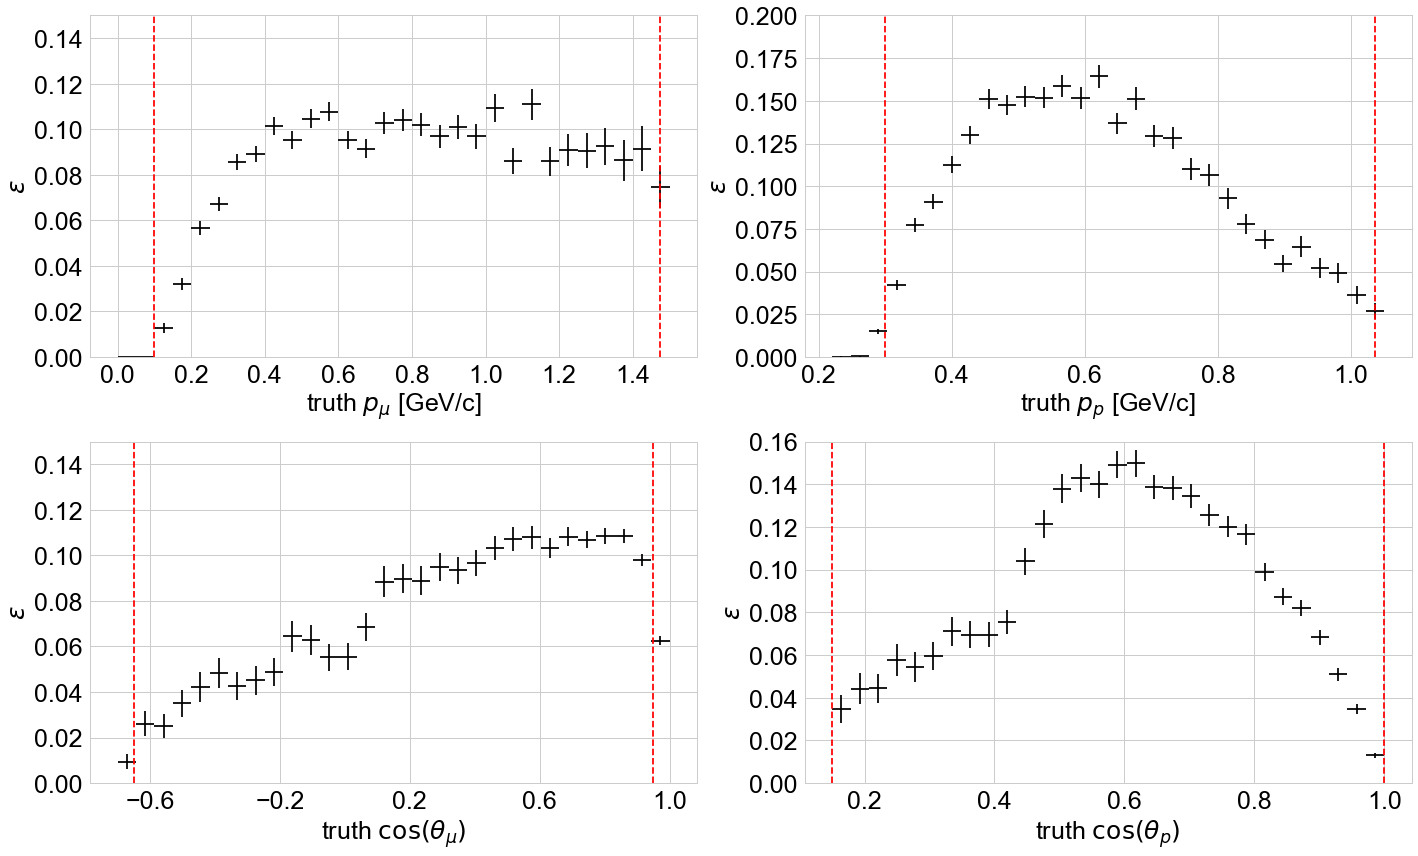

In [13]:
hPmu=compute_effiency(genie_CC1p=genie_CC1p,selected_CC1p=overlay_CC1p
                 ,bins=linspace(0,1.5,31)
                 ,xvar='truth_Pmu',do_draw=False);
hPp=compute_effiency(genie_CC1p=genie_CC1p,selected_CC1p=overlay_CC1p
                 ,bins=linspace(0.22,1.05,31)
                 ,xvar='truth_Pp',do_draw=False);
hCosTheta_mu=compute_effiency(genie_CC1p=genie_CC1p,selected_CC1p=overlay_CC1p
                 ,bins=linspace(-0.7,1,31)
                 ,xvar='truth_Pmu_cos_theta',do_draw=False);
hCosTheta_p=compute_effiency(genie_CC1p=genie_CC1p,selected_CC1p=overlay_CC1p
                 ,bins=linspace(0.15,1,31)
                 ,xvar='truth_Pp_cos_theta',do_draw=False);

eff_cutoff = 0.01
for h,hlabel in zip([hPmu,hPp,hCosTheta_mu,hCosTheta_p]
                   ,['Pmu','Pp','cos theta(mu)','cos theta(p)']
                  ):
    N = len(h['eff'])
    xmin_cutoff = np.min(h['mid'])
    for x,eff in zip(h['mid'][:N/2],h['eff'][:N/2]):
        if eff<eff_cutoff:
            xmin_cutoff = x
    h['x min cutoff']=xmin_cutoff
    xmax_cutoff = np.max(h['mid'])
    for x,eff in zip(h['mid'][N/2:],h['eff'][N/2:]):
        if eff<eff_cutoff:
            xmax_cutoff = x
            break
    h['x max cutoff']=xmax_cutoff
    print xmin_cutoff,'<',hlabel,'<',xmax_cutoff

hPmu['x min cutoff'] = 0.1
hPp['x min cutoff'] = 0.3
hCosTheta_mu['x min cutoff'] = -0.65
hCosTheta_mu['x max cutoff'] = 0.95
hCosTheta_p['x min cutoff'] = 0.15
hCosTheta_p['x max cutoff'] = 1.


ylabel=r'$\epsilon$'
fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(2,2,1)
plt.errorbar(x=hPmu['mid'],xerr=hPmu['bin width'],y=hPmu['eff'],yerr=hPmu['eff err']
                 ,color='black',capsize=10,fmt='.',markersize=0)
set_axes(ax,x_label=r'truth '+(Vlabels['Pmu']+' ['+Units['Pmu']+']')
         ,y_label=ylabel,ylim=(0,0.15))
plt.plot([hPmu['x min cutoff'],hPmu['x min cutoff']],ax.get_ylim(),'--'
         ,[hPmu['x max cutoff'],hPmu['x max cutoff']],ax.get_ylim(),'--',color='red')
ax=fig.add_subplot(2,2,2)
plt.errorbar(x=hPp['mid'],xerr=hPp['bin width'],y=hPp['eff'],yerr=hPp['eff err']
                 ,color='black',capsize=10,fmt='.',markersize=0)
set_axes(ax,x_label=r'truth '+(Vlabels['Pp']+' ['+Units['Pp']+']')
         ,y_label=ylabel,ylim=(0,0.2))
plt.plot([hPp['x min cutoff'],hPp['x min cutoff']],ax.get_ylim(),'--'
         ,[hPp['x max cutoff'],hPp['x max cutoff']],ax.get_ylim(),'--',color='red')


ax=fig.add_subplot(2,2,3)
plt.errorbar(x=hCosTheta_mu['mid'],xerr=hCosTheta_mu['bin width'],y=hCosTheta_mu['eff'],yerr=hCosTheta_mu['eff err']
                 ,color='black',capsize=10,fmt='.',markersize=0)
set_axes(ax,x_label=r'truth '+Vlabels['cos(theta(mu))']
         ,y_label=ylabel,ylim=(0,0.15),xticks=(-0.6,-0.2,0.2,0.6,1))
plt.plot([hCosTheta_mu['x min cutoff'],hCosTheta_mu['x min cutoff']],ax.get_ylim(),'--'
         ,[hCosTheta_mu['x max cutoff'],hCosTheta_mu['x max cutoff']],ax.get_ylim(),'--',color='red')



ax=fig.add_subplot(2,2,4)
plt.errorbar(x=hCosTheta_p['mid'],xerr=hCosTheta_p['bin width'],y=hCosTheta_p['eff'],yerr=hCosTheta_p['eff err']
                 ,color='black',capsize=10,fmt='.',markersize=0)
set_axes(ax,x_label=r'truth '+Vlabels['cos(theta(p))']
         ,y_label=ylabel,ylim=(0,0.16))
plt.plot([hCosTheta_p['x min cutoff'],hCosTheta_p['x min cutoff']],ax.get_ylim(),'--'
         ,[hCosTheta_p['x max cutoff'],hCosTheta_p['x max cutoff']],ax.get_ylim(),'--',color='red')

plt.tight_layout()


# phase-space: mc signal from overlay  

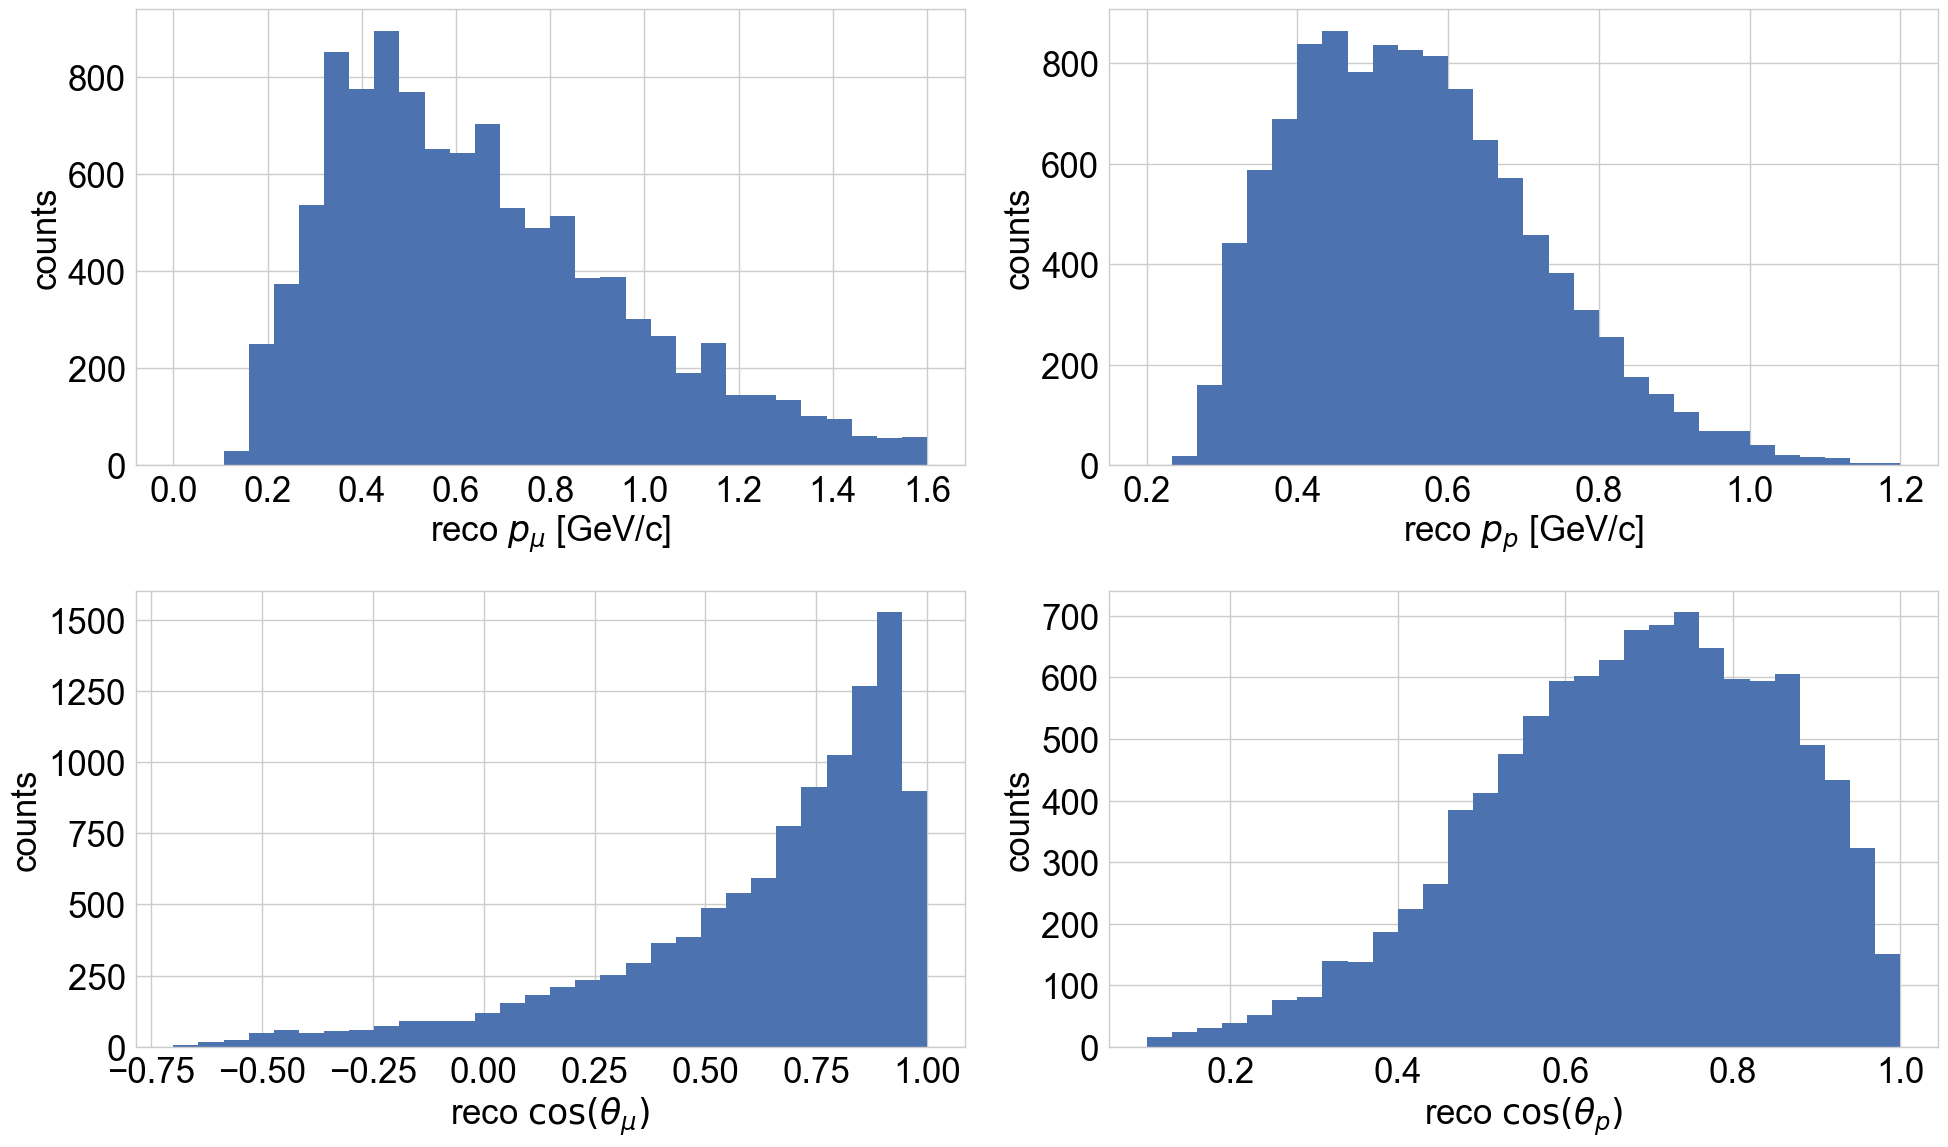

In [8]:
ylabel=r'counts'
fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(2,2,1)
plt.hist(overlay_CC1p['reco_Pmu_mcs'],bins=linspace(0,1.6,31))
set_axes(ax,x_label=r'reco '+(Vlabels['Pmu']+' ['+Units['Pmu']+']'),y_label=ylabel)

ax=fig.add_subplot(2,2,2)
plt.hist(overlay_CC1p['reco_Pp'],bins=linspace(0.2,1.2,31))
set_axes(ax,x_label=r'reco '+(Vlabels['Pp']+' ['+Units['Pp']+']'),y_label=ylabel)

ax=fig.add_subplot(2,2,3)
plt.hist(overlay_CC1p['reco_Pmu_cos_theta'],bins=linspace(-0.70,1,31))
set_axes(ax,x_label=r'reco '+Vlabels['cos(theta(mu))'],y_label=ylabel)


ax=fig.add_subplot(2,2,4)
plt.hist(overlay_CC1p['reco_Pp_cos_theta'],bins=linspace(0.1,1,31))
set_axes(ax,x_label=r'reco '+Vlabels['cos(theta(p))'],y_label=ylabel)
plt.tight_layout()